# Download data

In [3]:
import pandas as pd
data = pd.read_csv('/content/Salary_Data.csv')
print(data.head())

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [24]:
print(len(data))


30


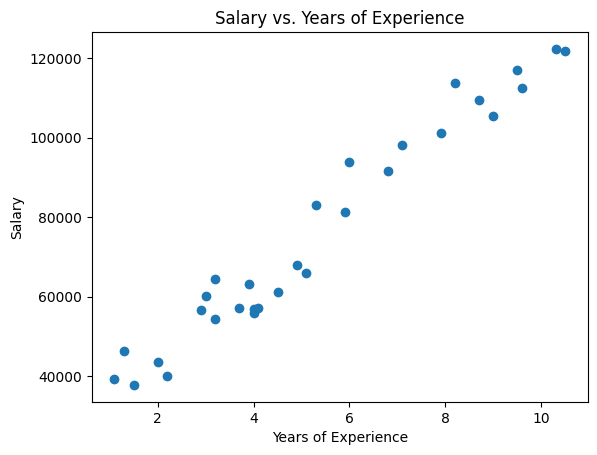

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data['YearsExperience'], data['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()


YearsExperience    0
Salary             0
dtype: int64
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000
                 YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000


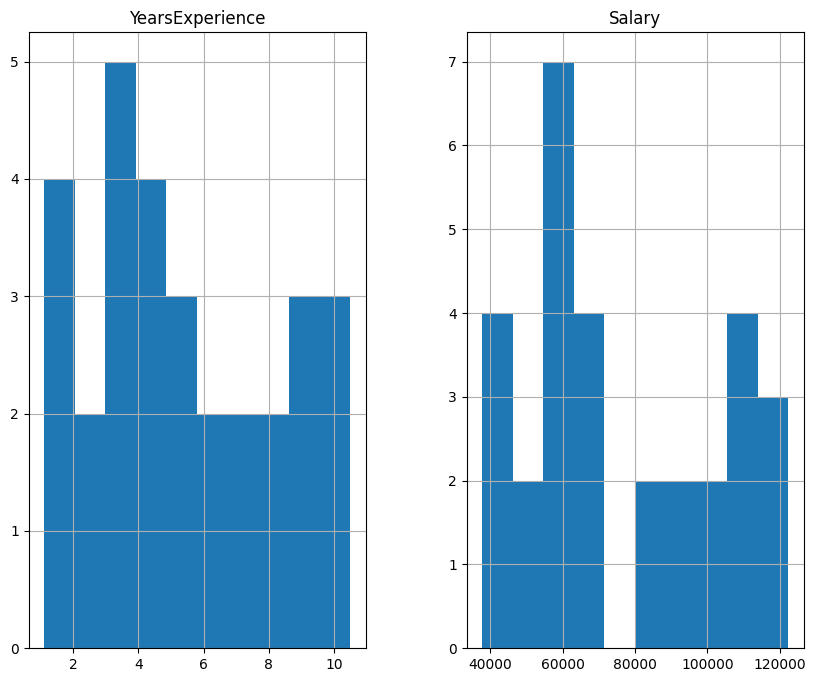

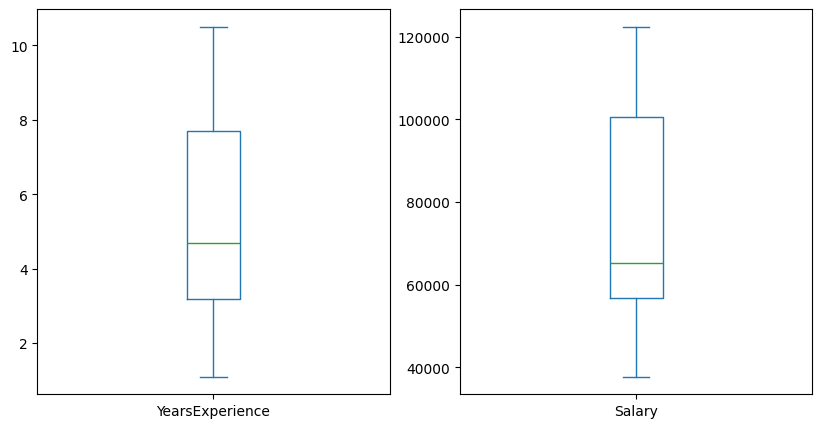

,0
YearsExperience,float64
Salary,int64


In [5]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Correlation matrix
print(data.corr())

# Histograms of numerical features
data.hist(figsize=(10, 8))
plt.show()

# Box plots for numerical features
data.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False, figsize=(10, 5))
plt.show()

# Check data types of each column
data.dtypes




In [8]:
X = data[['YearsExperience']]
y = data['Salary']

In [14]:
data['x_square'] = data['YearsExperience'] ** 2
data['y_square'] = data['Salary'] ** 2
data['x_times_y'] = data['YearsExperience'] * data['Salary']
print(data.head())


   YearsExperience  Salary  x_square    y_square  x_times_y
0              1.1   39343      1.21  1547871649    43277.3
1              1.3   46205      1.69  2134902025    60066.5
2              1.5   37731      2.25  1423628361    56596.5
3              2.0   43525      4.00  1894425625    87050.0
4              2.2   39891      4.84  1591291881    87760.2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(len(X_train))
print(len(X_test))


24
6


# Linear Regression Explanation
"""
Linear regression is a fundamental statistical technique used to model the relationship between a dependent variable (y) and an independent variable (X). It follows the equation y = b0 + b1X, where b0 is the intercept and b1 is the slope of the line. The intercept (b0) represents the value of y when X is zero, while the coefficient (b1) indicates how much y changes for a unit increase in X. These parameters are estimated using statistical methods like the Ordinary Least Squares (OLS) approach, which minimizes the sum of squared residuals. The accuracy of the model is evaluated using metrics such as the coefficient of determination (R²) and mean squared error (MSE). Residual plots help assess the goodness-of-fit and detect patterns that indicate model assumptions violations.

The formulas for b1 (slope) and b0 (intercept) are:

    b1 = (ΣXY - (ΣX * ΣY) / n) / (ΣX² - (ΣX² / n))

    b0 = mean(Y) - b1 * mean(X)
    
These calculations ensure that the regression line best fits the given data points.
"""

In [20]:
sum_x_times_y = data['x_times_y'][X_train.index].sum()
sum_x_square = data['x_square'][X_train.index].sum()
sum_x=X_train.sum()
sum_y=y_train.sum()
n=len(X_train)

print(f"Sum of x times y for the training set: {sum_x_times_y}")
print(f"Sum of x squared for the training set: {sum_x_square}")
print(f"Sum of x for the training set: {sum_x}")
print(f"Sum of y for the training set: {sum_y}")
print(f"Number of data points in the training set: {n}")


Sum of x times y for the training set: 11116320.7
Sum of x squared for the training set: 845.0699999999999
Sum of x for the training set: YearsExperience    124.5
dtype: float64
Sum of y for the training set: 1780983
Number of data points in the training set: 24


In [21]:
a=(sum_x_times_y-(sum_x*sum_y)/n)/(sum_x_square-(sum_x**2)/n)
b=sum_y/n-a*sum_x/n
print(a)
print(b)

YearsExperience    9423.815323
dtype: float64
YearsExperience    25321.583012
dtype: float64


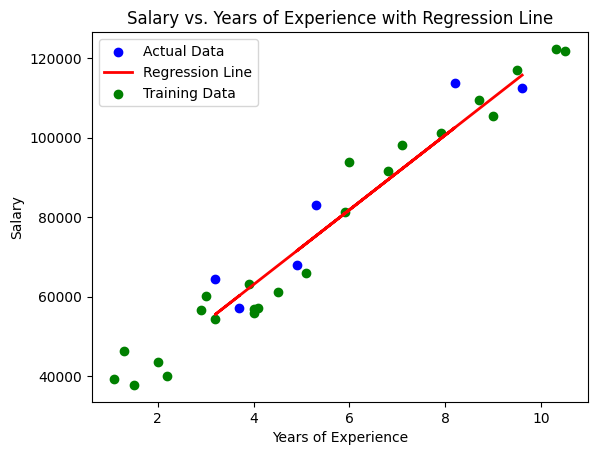

In [29]:
import matplotlib.pyplot as plt
y_pred1 = a * X_test + b

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred1, color='red', linewidth=2, label='Regression Line of y=ax+b')
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience with Regression Line')
plt.legend()
plt.show()


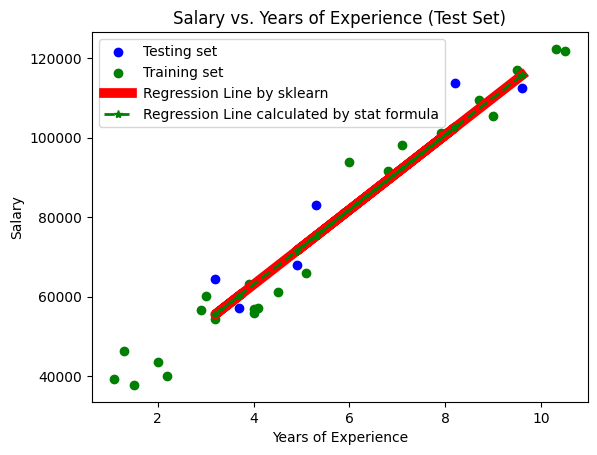

In [39]:
import matplotlib.pyplot as plt
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Plotting the regression line
import matplotlib.pyplot as plt
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue',label='Testing set')
plt.scatter(X_train, y_train, color='green',label="Training set")
plt.plot(X_test, y_pred, color='red',linewidth=7,label='Regression Line by sklearn')
plt.plot(X_test,y_pred1,color='green', linewidth=2, linestyle='dashed', marker='*', label='Regression Line calculated by stat formula')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience (Test Set)')
plt.legend()
plt.show()